# **Milestone 2**

We have built two Convolutional Neural Network architectures in Milestone 1. Here, we will further try to achieve better performance by increasing the number of parameters/weights. Therefore, we will start this Milestone with three popular Transfer Learning architectures, namely, VGG16, ResNet v2, and Efficient Net. Please feel free to explore other pre-trained models as well. Link to Keras documentation for pre-trained models - https://keras.io/api/applications/

**Note:** We will mount our drive and import our dataset once again for Milestone 2.

## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is not a library that can be downloaded locally on your device.**

In [3]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the Libraries**

In [4]:
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D, LeakyReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

### **Let us load the data**

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [5]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/DataScience/Facial_emotion_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [6]:
picture_size = 48
folder_path = "Facial_emotion_images/"

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. Unlike in Milestone 1, we will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

In [ ]:
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range = (0., 2.),
                                    rescale = 1./255,
                                    shear_range = 0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode = "rgb",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)

datagen_test = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode = "rgb",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)


Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


In [15]:
#Creating one-hot encoded vector of the labels
FacesLabel_vector = np.concatenate((test_set[0][1],test_set[1][1],test_set[2][1],test_set[3][1]))
print(FacesLabel_vector)

# Converting each entry to single label from one-hot encoded vector

FacesLabel_single = np.argmax(FacesLabel_vector, axis = -1)
print(FacesLabel_single)

FacesLabel_single.shape

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0.

(128,)

## **VGG16 Model**

### **Importing the VGG16 Architecture**

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (48, 48, 3))
vgg.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                              

### **Model Building**

* In this model, we will import till the **'block5_pool'** layer of the VGG16 model. You can scroll down in the model summary and look for 'block5_pool'. You can choose any other layer as well.
* Then we will add a Flatten layer, which receives the output of the 'block5_pool' layer as its input.
* We will add a few Dense layers and use 'relu' activation function on them.
* You may use Dropout and BatchNormalization layers as well.
* Then we will add our last dense layer, which must have 4 neurons and a 'softmax' activation function.

In [ ]:
transfer_layer = vgg.get_layer('block5_pool')
vgg.trainable = False

# Add classification layers on top of it  

# Flattenning the output from the 5th block of the VGG16 model
x = Flatten()(transfer_layer.output)

# Adding a Dense layer with 256 neurons
x = Dense(256, activation = 'relu')(x)

# Add a Dense Layer with 128 neurons
x = Dense(128, activation = 'relu')(x)

# Add a DropOut layer with Drop out ratio of 0.3
x = Dropout(0.3)(x)

# Add a Dense Layer with 64 neurons
x = Dense(64, activation = 'relu')(x)

# Add a Batch Normalization layer
x = BatchNormalization()(x)

# Adding the final dense layer with 4 neurons and use 'softmax' activation
pred = Dense(4, activation='softmax')(x)

vggmodel = Model(vgg.input, pred) # Initializing the model

### **Compiling and Training the VGG16 Model**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./vggmodel.h5", monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [ ]:
# Write your code to compile the vggmodel. Use categorical crossentropy as the loss function, Adam Optimizer with 0.001 learning rate, and set metrics to 'accuracy'.
vggmodel.compile(optimizer=Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy']) 

In [ ]:
history_vggmodel = vggmodel.fit(train_set, validation_data = validation_set, batch_size=32, callbacks = callbacks_list, epochs=20, verbose=1)

Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.2061 - accuracy: 0.4452
Epoch 1: val_loss did not improve from 1.35074
473/473 [==============================] - 460s 972ms/step - loss: 1.2061 - accuracy: 0.4452 - val_loss: 1.2725 - val_accuracy: 0.3958 - lr: 2.0000e-04
Epoch 2/20
473/473 [==============================] - ETA: 0s - loss: 1.1759 - accuracy: 0.4673
Epoch 2: val_loss did not improve from 1.35074
473/473 [==============================] - 459s 970ms/step - loss: 1.1759 - accuracy: 0.4673 - val_loss: 1.2736 - val_accuracy: 0.3860 - lr: 2.0000e-04
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 1.1650 - accuracy: 0.4745
Epoch 3: val_loss did not improve from 1.35074
473/473 [==============================] - 458s 969ms/step - loss: 1.1650 - accuracy: 0.4745 - val_loss: 1.3052 - val_accuracy: 0.3456 - lr: 2.0000e-04
Epoch 4/20
473/473 [==============================] - ETA: 0s - loss: 1.1594 - accuracy: 0.4778
Epoch 4: val_loss d

### **Evaluating the VGG16 model**

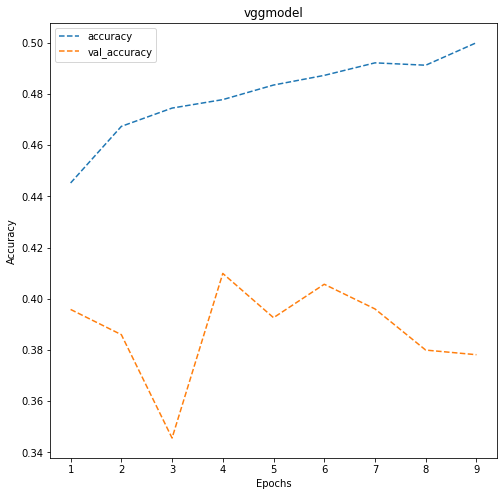

In [ ]:
# Write your code to evaluate model performance on the test set

# Plotting the accuracies

dict_hist = history_vggmodel.history

list_ep = [i for i in range(1, 10)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.title('vggmodel')

plt.legend()

plt.show()

In [ ]:
test_pred_vggmodel = vggmodel.predict(test_set)

test_pred_vggmodel = np.argmax(test_pred_vggmodel, axis = -1)

4/4 [==============================] - 3s 716ms/step


Classification report for RGB images trained vggmodel
              precision    recall  f1-score   support

           0       0.23      0.25      0.24        32
           1       0.25      0.41      0.31        32
           2       0.16      0.09      0.12        32
           3       0.24      0.16      0.19        32

    accuracy                           0.23       128
   macro avg       0.22      0.23      0.21       128
weighted avg       0.22      0.23      0.21       128



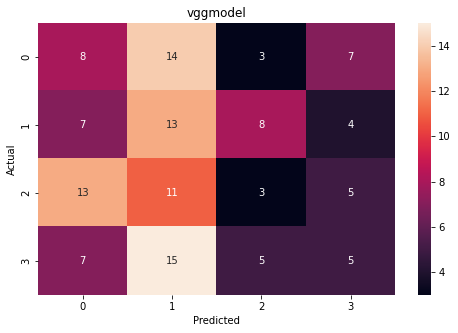

In [ ]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report for RGB
print("Classification report for RGB images trained vggmodel")

print(classification_report(FacesLabel_single, test_pred_vggmodel))

# Plotting the heatmap using confusion matrix for RGB

cm = confusion_matrix(FacesLabel_single, test_pred_vggmodel)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.title('vggmodel')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Think About It:**

- What do you infer from the general trend in the training performance? 
- Is the training accuracy consistently improving? 
- Is the validation accuracy also improving similarly?

**Observations and Insights:**

*   The general trend in the training performance was consistently improving with each new epoch, but only very slowly. Out of an initially planned 20 epochs additional training was cancelled, as per the Early Stopping parameter, after only 9 epochs for insufficent improvements in learning after going from 0.44 accuracy to 0.5 accuracy
*   Validation accuracy was inconsistent but was in general unchanged. Varying in between 0.40 to 0.38 depending on the epoch, with little clear trend.
*   All the above observations suggest that the model was overfitting on the training data. However, the model is giving about 0.5 accuracy on the test data which is somewhat comparable to the accuracy of the validation data, which is about 0.38. This implies that while overfitting does occur the model is still giving an acceptibly generalized performance.
*   The array for the input images is accompanied by another array for storing the label of what kind of face the image actually corresponds to:
  *       [1, 0, 0, 0] corresponds to a face classed as 'Happy'.
  *       [0, 1, 0, 0] corresponds to a face classed as 'Sad'.
  *       [0, 0, 1, 0] corresponds to a face classed as 'Neutral'.
  *       [0, 0, 0, 1] corresponds to a face classed as 'Surprised'.
*   On the Test data the recall values have a broad range, from 0.41 to 0.09, which implies that the model is inconsistent at identifying differing emotions.
*   On the Test data the precision values have a narrow range, from 0.25 to 0.16, which implies that the model is focused on features of objects that can help to distinguish between differing emotions.
*   The classification report and confusion matrix for Test data put into the  modified VGG16 model shows poor performance, little different than a random choice. Both precision and recall values are low, impling large numbers of false positives and negatives for all predictions. Especially poor were the response to Neutral or Surprised faces, these had a notable tendency to be misclassified as Happy or Sad.

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance**

**The following is representative of one of several experiments with altering the dropout rate in an attempt to limit the overfitting seen in with the original parameters.**

In [ ]:
transfer_layer = vgg.get_layer('block5_pool')
vgg.trainable = False

# Add classification layers on top of it  

# Flattenning the output from the 5th block of the VGG16 model
x = Flatten()(transfer_layer.output)

# Adding a Dense layer with 256 neurons
x = Dense(256, activation = 'relu')(x)

# Add a Dense Layer with 128 neurons
x = Dense(128, activation = 'relu')(x)

# Add a DropOut layer with Drop out ratio of 0.2
x = Dropout(0.4)(x)

# Add a Dense Layer with 64 neurons
x = Dense(64, activation = 'relu')(x)

# Add a Batch Normalization layer
x = BatchNormalization()(x)

# Adding the final dense layer with 4 neurons and use 'softmax' activation
pred = Dense(4, activation='softmax')(x)

vggmodel_dropout0p4 = Model(vgg.input, pred) # Initializing the model

from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./vggmodel_dropout0p4.h5", monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

vggmodel_dropout0p4.compile(optimizer=Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy']) 

history_vggmodel_dropout0p4 = vggmodel_dropout0p4.fit(train_set, validation_data = validation_set, batch_size=32, callbacks = callbacks_list, epochs=20, verbose=1)

Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.3639 - accuracy: 0.3556
Epoch 1: val_loss improved from -inf to 1.27737, saving model to ./vggmodel_dropout0p4.h5
473/473 [==============================] - 608s 1s/step - loss: 1.3639 - accuracy: 0.3556 - val_loss: 1.2774 - val_accuracy: 0.3810 - lr: 0.0010
Epoch 2/20
473/473 [==============================] - ETA: 0s - loss: 1.2408 - accuracy: 0.4229
Epoch 2: val_loss improved from 1.27737 to 1.36502, saving model to ./vggmodel_dropout0p4.h5
473/473 [==============================] - 603s 1s/step - loss: 1.2408 - accuracy: 0.4229 - val_loss: 1.3650 - val_accuracy: 0.3355 - lr: 0.0010
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 1.2012 - accuracy: 0.4499
Epoch 3: val_loss did not improve from 1.36502
473/473 [==============================] - 603s 1s/step - loss: 1.2012 - accuracy: 0.4499 - val_loss: 1.3301 - val_accuracy: 0.3733 - lr: 0.0010
Epoch 4/20
473/473 [===========================

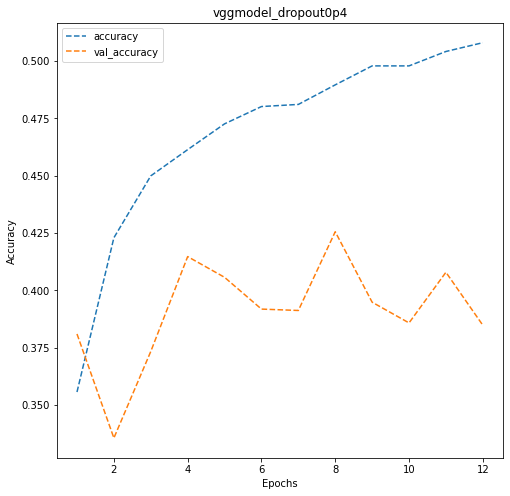

In [9]:
# Write your code to evaluate model performance on the test set

# Plotting the accuracies

dict_hist = history_vggmodel_dropout0p4.history

list_ep = [i for i in range(1, 13)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.title('vggmodel_dropout0p4')

plt.legend()

plt.show()

In [10]:
test_pred_vggmodel_dropout0p4 = vggmodel_dropout0p4.predict(test_set)

test_pred_vggmodel_dropout0p4 = np.argmax(test_pred_vggmodel_dropout0p4, axis = -1)

4/4 [==============================] - 4s 803ms/step


Classification report for RGB images trained vggmodel with Dropout set to 0.4
              precision    recall  f1-score   support

           0       0.45      0.47      0.46        32
           1       0.29      0.44      0.35        32
           2       0.24      0.22      0.23        32
           3       0.83      0.47      0.60        32

    accuracy                           0.40       128
   macro avg       0.46      0.40      0.41       128
weighted avg       0.46      0.40      0.41       128



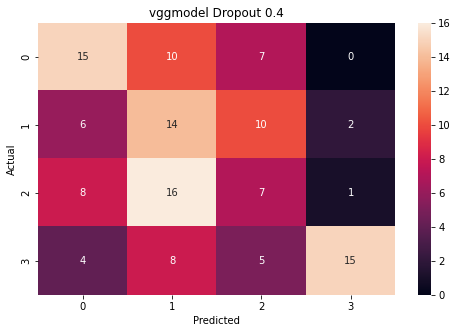

In [11]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report for RGB
print("Classification report for RGB images trained vggmodel with Dropout set to 0.4")

print(classification_report(FacesLabel_single, test_pred_vggmodel_dropout0p4))

# Plotting the heatmap using confusion matrix for RGB

cm = confusion_matrix(FacesLabel_single, test_pred_vggmodel_dropout0p4)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.title('vggmodel Dropout 0.4')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Observations and Insights:**

*   Testing with a value for Dropout of 0.4 did not see any signficant change in the accuracy and loss performance on the training or validation data verses when Dropout was set to 0.3.
*   Testing with a value for Dropout of 0.4 did see a signficant improvement in the accuracy performance on the test data verses when Dropout was set to 0.3.
*   On the Test data the recall values have a broad range, from 0.47 to 0.22, which implies that the model is inconsistent at identifying differing emotions.
*   On the Test data the precision values have a broad range, from 0.45 to 0.24, which implies that the model is not focused on features of objects that can help to distinguish between differing emotions.
*   The classification report and confusion matrix for Test data put into the modified VGG16 model where Dropout was set to 0.4 shows moderately good performance, somewhat better than a random choice. Both precision and recall values are low, impiling large numbers of false positives and negatives for all predictions. Especially poor were the response to Neutral faces, these had a notible tendancy to be misclassified as Sad.
*   Reruns of the model fitting with the same parameters saw differences in accuracy results of 0.1, better or worse, between runs. This indicates that the randomly generated starting weights can have a significant and upredicatible impact on results that can exceed the impact of merely altering the parameters alone. Multiple runs with the same parameter values or freezing the random number seed will be required to find the actual effect of changing parameters.

## **ResNet V2 Model**

In [ ]:
import tensorflow as tf
import tensorflow.keras.applications as ap
from tensorflow.keras import Model

Resnet = ap.ResNet101(include_top = False, weights = "imagenet", input_shape=(48,48,3))
Resnet.summary()

Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 54, 54, 3)    0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 24, 24, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 24, 24, 64)   256         ['conv1_conv[0][0]']             
                                                                                          

### **Model Building**

* In this model, we will import till the **'conv5_block3_add'** layer of the ResNet model. You can scroll down in the model summary and look for 'conv5_block3_add'. You can choose any other layer as well.
* Then we will add a Flatten layer, which receives the output of the 'conv5_block3_add' layer as its input.
* We will add a few Dense layers and use 'relu' activation function on them.
* You may use Dropout and BatchNormalization layers as well.
* Then we will add our last dense layer, which must have 4 neurons and a 'softmax' activation function.

In [ ]:
transfer_layer_Resnet = Resnet.get_layer('conv5_block3_add')
Resnet.trainable=False

# Add classification layers on top of it

# Flattenning the output from the 3rd block of the VGG16 model
x = Flatten()(transfer_layer_Resnet.output)

# Add a Dense layer with 256 neurons
x = Dense(256, activation = 'relu')(x)

# Add a Dense Layer with 128 neurons
x = Dense(128, activation = 'relu')(x)

# Add a DropOut layer with Drop out ratio of 0.3
x = Dropout(0.3)(x)

# Add a Dense Layer with 64 neurons
x = Dense(64, activation = 'relu')(x)

# Add a Batch Normalization layer
x = BatchNormalization()(x)

# Add the final dense layer with 4 neurons and use a 'softmax' activation
pred = Dense(4, activation = 'softmax')(x)

resnetmodel = Model(Resnet.input, pred) # Initializing the model

### **Compiling and Training the Model**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./Resnetmodel.h5", monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 10

In [ ]:
# Write your code to compile your resnetmodel. Use categorical crossentropy as your loss function, Adam Optimizer with 0.001 learning rate, and set your metrics to 'accuracy'. 
resnetmodel.compile(optimizer=Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy']) 

In [ ]:
# Write your code to fit your model. Use train_set as your training data and validation_set as your validation data. Train your model for 20 epochs.
history_resnetmodel = resnetmodel.fit(train_set, validation_data = validation_set, batch_size=32, callbacks = callbacks_list, epochs=20, verbose=1)


Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.4710 - accuracy: 0.2592

473/473 [==============================] - 397s 821ms/step - loss: 1.4710 - accuracy: 0.2592 - val_loss: 1.3770 - val_accuracy: 0.2289 - lr: 0.0010
Epoch 2/20
473/473 [==============================] - ETA: 0s - loss: 1.4078 - accuracy: 0.2579

473/473 [==============================] - 377s 798ms/step - loss: 1.4078 - accuracy: 0.2579 - val_loss: 1.3638 - val_accuracy: 0.2289 - lr: 0.0010
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 1.3983 - accuracy: 0.2592

473/473 [==============================] - 379s 801ms/step - loss: 1.3983 - accuracy: 0.2592 - val_loss: 1.3740 - val_accuracy: 0.2289 - lr: 0.0010
Epoch 4/20
473/473 [==============================] - ETA: 0s - loss: 1.3949 - accuracy: 0.2597

473/473 [==============================] - 344s 728ms/step - loss: 1.3949 - accuracy: 0.2597 - val_loss: 1.3518 - val_accuracy: 0.3667 - lr: 0.0010
Epoch 5/20
473/473 [==============================] - ETA: 0s - loss: 1.3950 - accuracy: 0.2614

473/473 [==============================] - 362s 766ms/step - loss: 1.3950 - accuracy: 0.2614 - val_loss: 1.3661 - val_accuracy: 0.2441 - lr: 0.0010
Epoch 6/20
473/473 [==============================] - ETA: 0s - loss: 1.3919 - accuracy: 0.2676

473/473 [==============================] - 365s 771ms/step - loss: 1.3919 - accuracy: 0.2676 - val_loss: 1.3581 - val_accuracy: 0.3667 - lr: 0.0010
Epoch 7/20
473/473 [==============================] - ETA: 0s - loss: 1.3915 - accuracy: 0.2671Restoring model weights from the end of the best epoch: 4.



Epoch 7: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
473/473 [==============================] - 368s 779ms/step - loss: 1.3915 - accuracy: 0.2671 - val_loss: 1.3792 - val_accuracy: 0.2443 - lr: 0.0010
Epoch 7: early stopping


### **Evaluating the ResNet Model**

In [ ]:
# Write your code to evaluate model performance on the test set
test_pred_resnetmodel = resnetmodel.predict(test_set)

test_pred_resnetmodel = np.argmax(test_pred_resnetmodel, axis = -1)

4/4 [==============================] - 5s 605ms/step


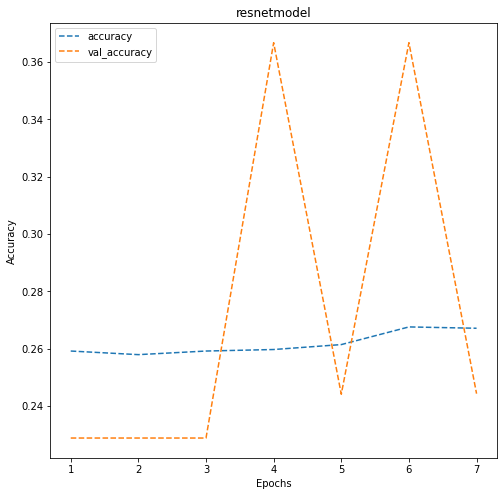

In [ ]:
# Write your code to evaluate model performance on the test set

# Plotting the accuracies

dict_hist = history_resnetmodel.history

list_ep = [i for i in range(1, 8)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.title('resnetmodel')

plt.legend()

plt.show()

Classification report for RGB images trained resnetmodel
              precision    recall  f1-score   support

           0       0.25      1.00      0.40        32
           1       0.00      0.00      0.00        32
           2       0.00      0.00      0.00        32
           3       0.00      0.00      0.00        32

    accuracy                           0.25       128
   macro avg       0.06      0.25      0.10       128
weighted avg       0.06      0.25      0.10       128



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


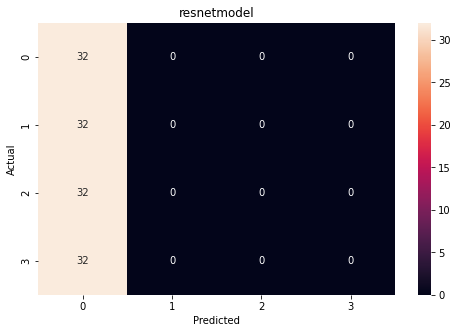

In [ ]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report for RGB
print("Classification report for RGB images trained resnetmodel")

print(classification_report(FacesLabel_single, test_pred_resnetmodel))

# Plotting the heatmap using confusion matrix for RGB

cm = confusion_matrix(FacesLabel_single, test_pred_resnetmodel)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.title('resnetmodel')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Observations and Insights:**

*   The general trend in the training performance was consistently not improving with each new epoch, it started low and stayed low. Out of an initially planned 20 epochs additional training was cancelled, as per the Early Stopping parameter, after only 7 epochs for insufficent improvements in learning after going from 0.25 accuracy to 0.26 accuracy
*   Validation accuracy was inconsistent but was in general unchanged. Varying in between 0.36 to 0.25 depending on the epoch, with little clear trend.
*   All the above observations suggest that the model was overfitting on the training data. However, the model is giving about 0.25 accuracy on the test data which is somewhat comparable to the accuracy of the validation data, which is about 0.30. This implies that while overfitting does occur the model is still giving an acceptibly generalized performance.
*   The array for the input images is accompanied by another array for storing the label of what kind of face the image actually corresponds to:
  *       [1, 0, 0, 0] corresponds to a face classed as 'Happy'.
  *       [0, 1, 0, 0] corresponds to a face classed as 'Sad'.
  *       [0, 0, 1, 0] corresponds to a face classed as 'Neutral'.
  *       [0, 0, 0, 1] corresponds to a face classed as 'Surprised'.
*   On the Test data the recall values have a broad range, from 1 to 0, which implies that the model is inconsistent at identifying differing emotions.
*   On the Test data the precision values have a moderate range, from 0.25 to 0, which implies that the model is somewhat focused on features of objects that can help to distinguish between differing emotions.
*   The classification report and confusion matrix for test data put into the modified ResNet model, shows extremely poor performance. Both precision and recall values are low, impling large numbers of false positives and negatives for all predictions, worse results than a random sampling. Especially poor were the response to Sad Neutral or Surprised faces, these were all misclassified as Happy.

## **EfficientNet Model**

### **Model Building**

**Build your own Architecture on top of the transfer layer. Be sure to have a Flatten layer after your transfer layer and also make sure you have 4 neurons and softmax activation function in your last dense layer**

In [ ]:
import tensorflow as tf
import tensorflow.keras.applications as ap
from tensorflow.keras import Model
EfficientNet = ap.EfficientNetV2B2(include_top=False,weights="imagenet", input_shape= (48, 48, 3))

EfficientNet.summary()

35839040/35839040 [==============================] - 0s 0us/step
Model: "efficientnetv2-b2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 rescaling (Rescaling)          (None, 48, 48, 3)    0           ['input_4[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 48, 48, 3)    0           ['rescaling[0][0]']              
                                                                                                  
 stem_conv (Conv2D)             (None, 24, 24, 32)   864         ['normalization[0][0]']          
                 

In [ ]:
transfer_layer_EfficientNet = EfficientNet.get_layer('block6e_expand_activation')
EfficientNet.trainable = False

# Add your Flatten layer.
x = Flatten()(transfer_layer_EfficientNet.output)

# Add your Dense layers and/or BatchNormalization and Dropout layers
x = Dense(256, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(64, activation = 'relu')(x)
x = BatchNormalization()(x)

# Add your final Dense layer with 4 neurons and softmax activation function.
pred = Dense(4, activation = 'softmax')(x)

EfficientNetmodel = Model(EfficientNet.input, pred) # Initializing the model

### **Compiling and Training the Model**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./Efficientnetmodel.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 10

In [ ]:
# Write your code to compile your Efficientnetmodel. Use categorical crossentropy as your loss function, Adam Optimizer with 0.001 learning rate, and set your metrics to 'accuracy'.
EfficientNetmodel.compile(optimizer=Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy']) 

In [ ]:
# Write your code to fit your model. Use train_set as your training data and validation_set as your validation data. Train your model for 20 epochs.
history_EfficientNetmodel = EfficientNetmodel.fit(train_set, validation_data = validation_set, batch_size=32, callbacks = callbacks_list, epochs=20, verbose=1)

Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.4347 - accuracy: 0.2566

473/473 [==============================] - 120s 237ms/step - loss: 1.4347 - accuracy: 0.2566 - val_loss: 1.4760 - val_accuracy: 0.2289 - lr: 0.0010
Epoch 2/20
473/473 [==============================] - ETA: 0s - loss: 1.4046 - accuracy: 0.2577

473/473 [==============================] - 109s 231ms/step - loss: 1.4046 - accuracy: 0.2577 - val_loss: 1.3987 - val_accuracy: 0.2289 - lr: 0.0010
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 1.3988 - accuracy: 0.2612

473/473 [==============================] - 110s 232ms/step - loss: 1.3988 - accuracy: 0.2612 - val_loss: 1.3596 - val_accuracy: 0.3667 - lr: 0.0010
Epoch 4/20
473/473 [==============================] - ETA: 0s - loss: 1.3967 - accuracy: 0.2624

473/473 [==============================] - 108s 229ms/step - loss: 1.3967 - accuracy: 0.2624 - val_loss: 1.3512 - val_accuracy: 0.3667 - lr: 0.0010
Epoch 5/20
473/473 [==============================] - ETA: 0s - loss: 1.3919 - accuracy: 0.2604

473/473 [==============================] - 107s 226ms/step - loss: 1.3919 - accuracy: 0.2604 - val_loss: 1.3696 - val_accuracy: 0.3667 - lr: 0.0010
Epoch 6/20
473/473 [==============================] - ETA: 0s - loss: 1.3919 - accuracy: 0.2576

473/473 [==============================] - 103s 218ms/step - loss: 1.3919 - accuracy: 0.2576 - val_loss: 1.4135 - val_accuracy: 0.2289 - lr: 0.0010
Epoch 7/20
473/473 [==============================] - ETA: 0s - loss: 1.3906 - accuracy: 0.2633Restoring model weights from the end of the best epoch: 4.



Epoch 7: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
473/473 [==============================] - 101s 214ms/step - loss: 1.3906 - accuracy: 0.2633 - val_loss: 1.3865 - val_accuracy: 0.2289 - lr: 0.0010
Epoch 7: early stopping


### **Evaluating the EfficientnetNet Model**

In [ ]:
# Write your code to evaluate model performance on the test set
test_pred_EfficientNemodel = EfficientNetmodel.predict(test_set)

test_pred_EfficientNetmodel = np.argmax(test_pred_EfficientNemodel, axis = -1)

4/4 [==============================] - 1s 174ms/step


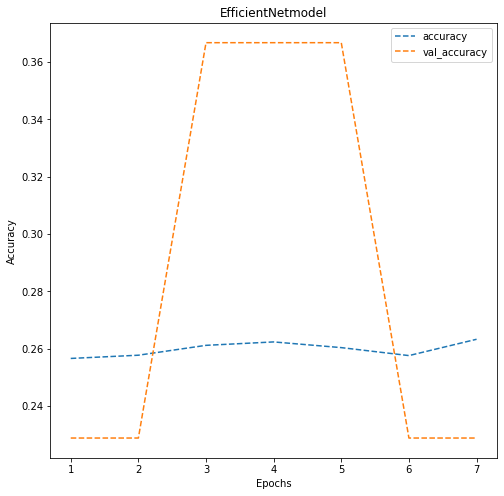

In [ ]:
# Plotting the accuracies

dict_hist = history_EfficientNetmodel.history

list_ep = [i for i in range(1, 8)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.title('EfficientNetmodel')

plt.legend()

plt.show()

Classification report for RGB images trained EfficientNetmodel
              precision    recall  f1-score   support

           0       0.25      1.00      0.40        32
           1       0.00      0.00      0.00        32
           2       0.00      0.00      0.00        32
           3       0.00      0.00      0.00        32

    accuracy                           0.25       128
   macro avg       0.06      0.25      0.10       128
weighted avg       0.06      0.25      0.10       128



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


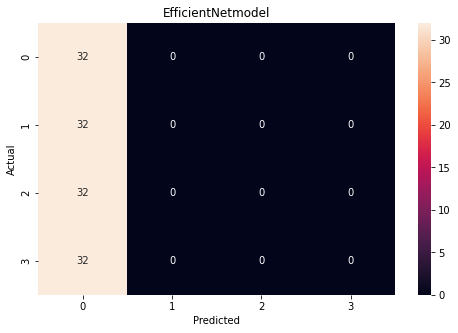

In [ ]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report for RGB
print("Classification report for RGB images trained EfficientNetmodel")

print(classification_report(FacesLabel_single, test_pred_EfficientNetmodel))

# Plotting the heatmap using confusion matrix for RGB

cm = confusion_matrix(FacesLabel_single, test_pred_EfficientNetmodel)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.title('EfficientNetmodel')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Observations and Insights:**

*   The general trend in the training performance was consistently not improving with each new epoch, it started low and stayed low. Out of an initially planned 20 epochs additional training was cancelled, as per the Early Stopping parameter, after only 7 epochs for insufficent improvements in learning after staying at about 0.26 accuracy
*   Validation accuracy was inconsistent but was in general unchanged. Varying in between 0.37 to 0.23 depending on the epoch, with little clear trend.
*   All the above observations suggest that the model was overfitting on the training data. However, the model is giving about 0.25 accuracy on the test data which is somewhat comparable to the accuracy of the validation data, which is about 0.30. This implies that while overfitting does occur the model is still giving an acceptibly generalized performance.
*   The array for the input images is accompanied by another array for storing the label of what kind of face the image actually corresponds to:
  *       [1, 0, 0, 0] corresponds to a face classed as 'Happy'.
  *       [0, 1, 0, 0] corresponds to a face classed as 'Sad'.
  *       [0, 0, 1, 0] corresponds to a face classed as 'Neutral'.
  *       [0, 0, 0, 1] corresponds to a face classed as 'Surprised'.
*   On the Test data the recall values have a broad range, from 1 to 0, which implies that the model is inconsistent at identifying differing emotions.
*   On the Test data the precision values have a moderate range, from 0.25 to 0, which implies that the model is somewhat focused on features of objects that can help to distinguish between differing emotions.
*   The classification report and confusion matrix for test data put into the modified EfficentNetV2B2 model, shows extremely poor performance. Both precision and recall values are low, impling large numbers of false positives and negatives for all predictions, worse results than a random sampling. Especially poor were the response to Sad Neutral or Surprised faces, these were all misclassified as Happy.

**Think About It:**

* What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received?
* Do you think our issue lies with 'rgb' color_mode?

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

## **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

In [7]:
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range = (0., 2.),
                                    rescale = 1./255,
                                    shear_range = 0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)


datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)

datagen_test = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)


Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


### **Model Building**

* In this network, we plan to have 5 Convolutional Blocks
* Add first Conv2D layer with **64 filters** and a **kernel size of 2**. Use the 'same' padding and provide the **input shape = (48, 48, 1)**. Use **'relu' activation**.
* Add your BatchNormalization layer followed by a LeakyRelU layer with Leaky ReLU parameter of **0.1**
* Add MaxPooling2D layer with **pool size = 2**.
* Add a Dropout layer with a Dropout Ratio of **0.2**. This completes the first Convolutional block.
* Add a second Conv2D layer with **128 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.**
* Follow this up with a similar BatchNormalization, LeakyRelU, Maxpooling2D, and Dropout layer like above to complete your second Convolutional Block.
* Add a third Conv2D layer with **512 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.** Once again, follow it up with a BatchNormalization, LeakyRelU, Maxpooling2D, and Dropout layer to complete your third Convolutional block.
* Add a fourth block, with the Conv2D layer having **512 filters**.
* Add the fifth block, having **128 filters**.
* Then add your Flatten layer, followed by your Dense layers.
* Add your first Dense layer with **256 neurons** followed by a BatchNormalization layer, a **'relu'** Activation, and a Dropout layer. This forms your first Fully Connected block
* Add your second Dense layer with **512 neurons**, again followed by a BatchNormalization layer, **relu** activation, and a Dropout layer.
* Add your final Dense layer with 4 neurons.
* Compile your model with the optimizer of your choice.

In [8]:
no_of_classes = 4

model3 = Sequential()

# Add 1st CNN Block
model3.add(Conv2D(64, (2, 2), activation='relu', input_shape = (48, 48, 1), padding = 'same'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.1))
model3.add(MaxPooling2D(2, 2))
model3.add(Dropout(0.2))

# Add 2nd CNN Block
model3.add(Conv2D(128, (2, 2), activation='relu', padding = 'same'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.1))
model3.add(MaxPooling2D(2, 2))
model3.add(Dropout(0.2))

# Add 3rd CNN Block
model3.add(Conv2D(512, (2, 2), activation='relu', padding = 'same'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.1))
model3.add(MaxPooling2D(2, 2))
model3.add(Dropout(0.2))

# Add 4th CNN Block
model3.add(Conv2D(512, (2, 2), activation='relu', padding = 'same'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.1))
model3.add(MaxPooling2D(2, 2))
model3.add(Dropout(0.2))

# Add 5th CNN Block
model3.add(Conv2D(128, (2, 2), activation='relu', padding = 'same'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.1))
model3.add(MaxPooling2D(2, 2))
model3.add(Dropout(0.2))

model3.add(Flatten())

# First fully connected layer
model3.add(Dense(256, activation = 'relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

# Second fully connected layer
model3.add(Dense(256, activation = 'relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

model3.add(Dense(no_of_classes, activation = 'softmax'))

### **Compiling and Training the Model**

In [9]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger

epochs = 35

steps_per_epoch = train_set.n//train_set.batch_size
validation_steps = validation_set.n//validation_set.batch_size

checkpoint = ModelCheckpoint("model3.h5", monitor = 'val_accuracy',
                            save_weights_only = True, model = 'max', verbose = 1)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 2, min_lr = 0.0001 , model = 'auto')

callbacks = [checkpoint, reduce_lr]

In [10]:
# Write your code to compile your model3. Use categorical crossentropy as the loss function, Adam Optimizer with 0.003 learning rate, and set metrics to 'accuracy'.
model3.compile(optimizer=Adam(learning_rate = 0.003), loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
# Write your code to fit your model. Use train_set as the training data and validation_set as the validation data. Train your model for 35 epochs.
history_model3 = model3.fit(train_set, validation_data = validation_set, batch_size=32, callbacks = callbacks, epochs=35, verbose=1)

Epoch 1/35
473/473 [==============================] - ETA: 0s - loss: 1.5352 - accuracy: 0.2637
Epoch 1: saving model to model3.h5
473/473 [==============================] - 343s 722ms/step - loss: 1.5352 - accuracy: 0.2637 - val_loss: 1.5731 - val_accuracy: 0.3386 - lr: 0.0030
Epoch 2/35
473/473 [==============================] - ETA: 0s - loss: 1.4223 - accuracy: 0.2810
Epoch 2: saving model to model3.h5
473/473 [==============================] - 345s 729ms/step - loss: 1.4223 - accuracy: 0.2810 - val_loss: 1.3774 - val_accuracy: 0.2795 - lr: 0.0030
Epoch 3/35
473/473 [==============================] - ETA: 0s - loss: 1.3691 - accuracy: 0.3162
Epoch 3: saving model to model3.h5
473/473 [==============================] - 339s 717ms/step - loss: 1.3691 - accuracy: 0.3162 - val_loss: 1.3204 - val_accuracy: 0.3719 - lr: 0.0030
Epoch 4/35
473/473 [==============================] - ETA: 0s - loss: 1.2762 - accuracy: 0.3786
Epoch 4: saving model to model3.h5
473/473 [=======================

### **Evaluating the Model on Test Set**

In [26]:
# Write your code to evaluate the model performance on the test set
test_pred_model3 = model3.predict(test_images)

test_pred_model3 = np.argmax(test_pred_model3, axis = -1)

4/4 [==============================] - 1s 168ms/step


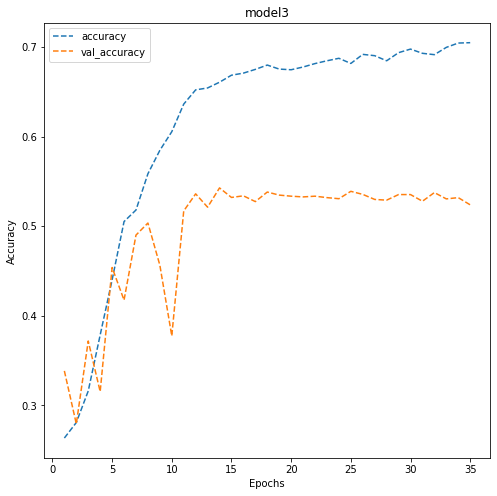

In [27]:
# Plotting the accuracies

dict_hist = history_model3.history

list_ep = [i for i in range(1, 36)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.title('model3')

plt.legend()

plt.show()

Classification report for Greyscale images trained model3
              precision    recall  f1-score   support

           0       0.20      0.19      0.19        32
           1       0.15      0.12      0.14        32
           2       0.42      0.59      0.49        32
           3       0.22      0.19      0.20        32

    accuracy                           0.27       128
   macro avg       0.25      0.27      0.26       128
weighted avg       0.25      0.27      0.26       128



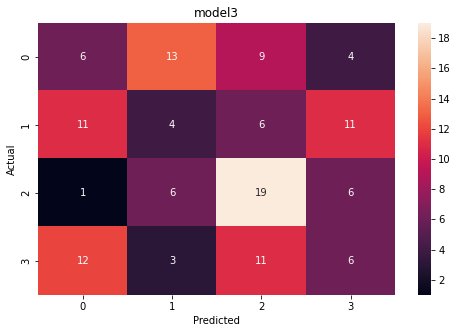

In [28]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report for model3
print("Classification report for Greyscale images trained model3")

print(classification_report(FacesLabel_single, test_pred_model3))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(FacesLabel_single, test_pred_model3)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.title('model3')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Observations and Insights:**

*   The general trend in the training performance was consistently improving with each new epoch, but only slowly after 15 epochs. 
*   Before 15 epochs the validation accuracy was inconsistent but was in general increasing, after 15 epochs the validation accuracy becomes relitively unchanges at about 0.52.
*   All the above observations suggest that the model was overfitting on the training data. However, the model is giving about 0.5 accuracy on the test data which is somewhat comparable to the accuracy of the validation data, which is about 0.38. This implies that while overfitting does occur the model is still giving an acceptibly generalized performance.
*   The array for the input images is accompanied by another array for storing the label of what kind of face the image actually corresponds to:
  *       [1, 0, 0, 0] corresponds to a face classed as 'Happy'.
  *       [0, 1, 0, 0] corresponds to a face classed as 'Sad'.
  *       [0, 0, 1, 0] corresponds to a face classed as 'Neutral'.
  *       [0, 0, 0, 1] corresponds to a face classed as 'Surprised'.
*   On the Test data the recall values have a broad range, from 0.12 to 0.59, which implies that the model is inconsistent at identifying differing emotions.
*   On the Test data the precision values have a broad range, from 0.15 to 0.42, which implies that the model is not focused on features of objects that can help to distinguish between differing emotions.
*   The classification report and confusion matrix for Test data put into the  Complex model shows poor performance, little different than a random choice. Both precision and recall values are low, impling large numbers of false positives and negatives for all predictions. The response to Neutral faces was best, all others had a tendency to be misclassified.

### **Plotting the Confusion Matrix for the chosen final model**

Found 128 images belonging to 4 classes.
4/4 [==============================] - 2s 460ms/step
Classification report for the best model: model3
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        32
           1       0.56      0.47      0.51        32
           2       0.55      0.69      0.61        32
           3       0.93      0.84      0.89        32

    accuracy                           0.70       128
   macro avg       0.70      0.70      0.70       128
weighted avg       0.70      0.70      0.70       128



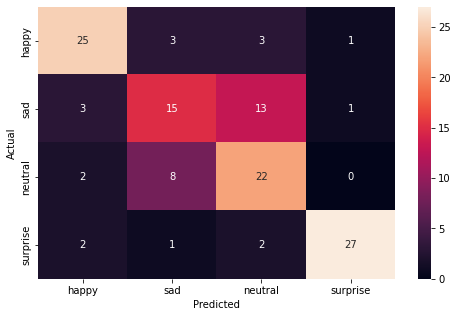

In [21]:
# Plot the confusion matrix and generate a classification report for the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
test_set = datagen_test.flow_from_directory(folder_path + "test",
                                                              target_size = (img_size,img_size),
                                                              color_mode = 'grayscale',
                                                              batch_size = 128,
                                                              class_mode = 'categorical',
                                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                                              shuffle = True) 
test_images, test_labels = next(test_set)

# Write the name of your chosen model in the blank
pred = model3.predict(test_images)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print("Classification report for the best model: model3")

print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral', 'surprise'], yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations and Insights:**

*   The classification report and confusion matrix for Test data put into the  Model3 model shows adaquate performance, signficantly improved over those of a random choice. Both precision and recall values are around 0.7, impling still signficant numbers of false positives and negatives for all predictions. Neutral faces had some tendancy to be missclassified as Sad. 

## **Conclusion:**



*   Model 3 was by far the best model tested in terms of classification performance on the test data.
*   Model 3 was by far the worst model tested in terms of time taken to fit the model on the training data.



### **Insights**

### **Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

### **Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

### **Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?